In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('./covid_symptoms_data.csv')
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed


In [3]:
df.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result
count,211186.000000,211186.000000,211186.000000,211186.000000,211186.000000,211186.000000
mean,0.310736,0.249079,0.071799,0.051855,0.106020,0.518784
std,0.462796,0.432481,0.258156,0.221734,0.307864,0.499648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.isnull().sum()

cough                   243
fever                   243
sore_throat             243
shortness_of_breath     243
head_ache               243
corona_result           243
age_60_and_above        243
gender                 5371
test_indication         243
dtype: int64

In [6]:
df.shape

(211429, 9)

In [7]:
df=df.dropna()
print('new df:',df.shape)

new df: (206058, 9)


In [8]:
#Replacing categorical variables with numbers
df=df.replace(to_replace="No", value=0.0)
df=df.replace(to_replace="Yes", value=1.0)
df=df.replace(to_replace="Male", value=0.0)
df=df.replace(to_replace="Female",value=1.0)

df=df.replace(to_replace="Other", value=1.0)
df=df.replace(to_replace="Abroad", value=2.0)
df=df.replace(to_replace="Contact with confirmed",value=3.0)

In [9]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0


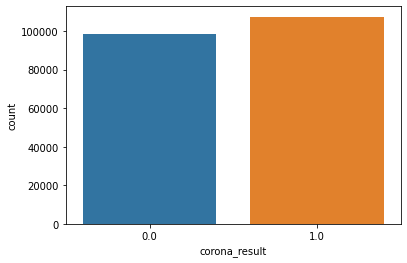

In [11]:
#number of +ve and -ve results
sn.countplot(x=df["corona_result"])
plt.show()

In [12]:
# Relationship among variables
rel=df.corr()
rel

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
cough,1.000000,0.405062,0.202896,0.195795,0.220778,0.377659,0.000766,-0.039114,0.301624
fever,0.405062,1.000000,0.160196,0.180182,0.247458,0.437327,0.073613,-0.087300,0.241511
sore_throat,0.202896,0.160196,1.000000,0.150116,0.282549,0.264471,-0.032025,0.035454,0.175073
shortness_of_breath,0.195795,0.180182,0.150116,1.000000,0.162358,0.222676,0.032874,-0.000051,0.112905
head_ache,0.220778,0.247458,0.282549,0.162358,1.000000,0.330164,-0.045978,0.019952,0.217364
corona_result,0.377659,0.437327,0.264471,0.222676,0.330164,1.000000,0.051769,-0.066191,0.540474
age_60_and_above,0.000766,0.073613,-0.032025,0.032874,-0.045978,0.051769,1.000000,0.012782,-0.046620
gender,-0.039114,-0.087300,0.035454,-0.000051,0.019952,-0.066191,0.012782,1.000000,0.011922
test_indication,0.301624,0.241511,0.175073,0.112905,0.217364,0.540474,-0.046620,0.011922,1.000000


<AxesSubplot:>

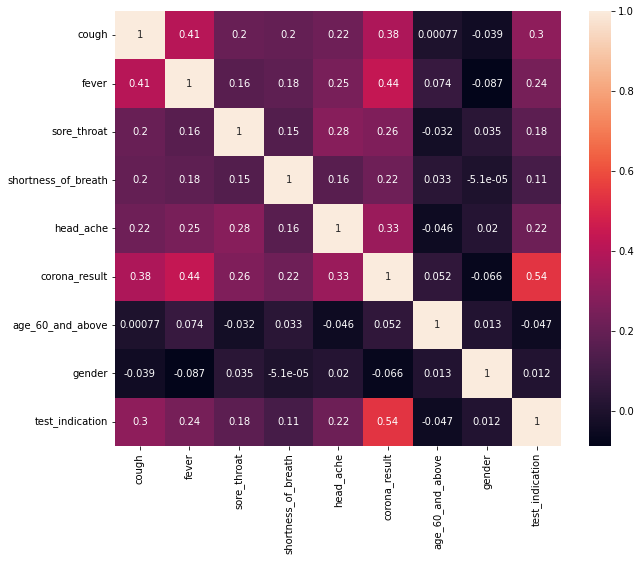

In [15]:
plt.figure(figsize=(10,8))
sn.heatmap(rel,xticklabels=rel.columns,yticklabels=rel.columns,annot=True)

In [16]:
# destribution data
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

In [17]:
X=df[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
     'age_60_and_above', 'gender', 'test_indication']]
y=df['corona_result']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.8492672037270698


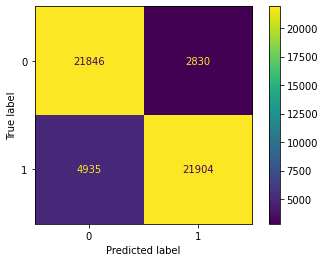

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85     24676
         1.0       0.89      0.82      0.85     26839

    accuracy                           0.85     51515
   macro avg       0.85      0.85      0.85     51515
weighted avg       0.85      0.85      0.85     51515



## K-Neighbors Classification

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [34]:
y_pred_knn=knn.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred_knn))

Accuracy: 0.6779578763466951


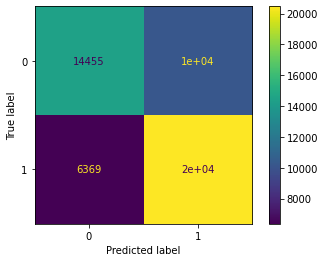

In [35]:
cm_knn=confusion_matrix(y_test,y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()

In [36]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.69      0.59      0.64     24676
         1.0       0.67      0.76      0.71     26839

    accuracy                           0.68     51515
   macro avg       0.68      0.67      0.67     51515
weighted avg       0.68      0.68      0.68     51515



## Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()

clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [38]:
y_pred_gb=clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred_gb))

Accuracy: 0.8629525380957003


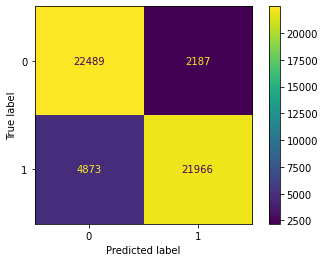

In [39]:
cm_gb=confusion_matrix(y_test,y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot()

In [40]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     24676
         1.0       0.91      0.82      0.86     26839

    accuracy                           0.86     51515
   macro avg       0.87      0.86      0.86     51515
weighted avg       0.87      0.86      0.86     51515



## RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=2)

rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2)

In [43]:
y_pred_rf=rf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred_rf))

Accuracy: 0.845850723090362


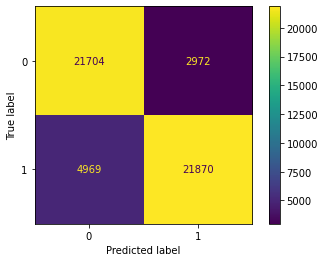

In [44]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()

In [45]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85     24676
         1.0       0.88      0.81      0.85     26839

    accuracy                           0.85     51515
   macro avg       0.85      0.85      0.85     51515
weighted avg       0.85      0.85      0.85     51515

